In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns
import glob

warnings.filterwarnings('ignore')
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
krfont = {'family':font_name, 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 불러오기
data = []
files = glob.glob('./data/Price_*.csv')
for f in files:
    tmp = pd.read_csv(f, encoding='CP949')
    tmp.drop(['조사구분코드','표준품목코드','조사가격품목코드','표준품종코드','조사가격품종코드','조사등급코드','표준단위코드','조사지역코드','표준시장코드','조사가격시장코드','표준단위명'], axis=1, inplace=True)
    data.append(tmp)
price = pd.concat(data)

In [103]:
beef = price.query('표준품목명 == "쇠고기"').drop(['조사구분명','표준품목명','조사가격품목명','조사단위명'], axis=1)
beef['조사일자'] = beef['조사일자'].astype('datetime64[ns]')
beef.info()
beef.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55780 entries, 2934 to 101402
Data columns (total 9 columns):
조사일자       55780 non-null datetime64[ns]
표준품종명      55780 non-null object
조사가격품종명    55780 non-null object
조사등급명      55780 non-null object
당일조사가격     55780 non-null int64
전일조사가격     55722 non-null float64
조사지역명      55780 non-null object
표준시장명      55780 non-null object
조사가격시장명    55780 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 4.3+ MB


,조사일자,표준품종명,조사가격품종명,조사등급명,당일조사가격,전일조사가격,조사지역명,표준시장명,조사가격시장명
2934,2016-01-04,갈비(수입),미국산갈비,하(3등급),2330,2330.0,서울서부,경동시장,경동시장
2935,2016-01-04,갈비(수입),미국산갈비,하(3등급),2130,2130.0,서울서부,복조리시장,복조리시장
2936,2016-01-04,갈비(수입),미국산갈비,하(3등급),2000,2000.0,서울서부,영등포 유통상가,영등포시장


#### 1. 데이터 개수

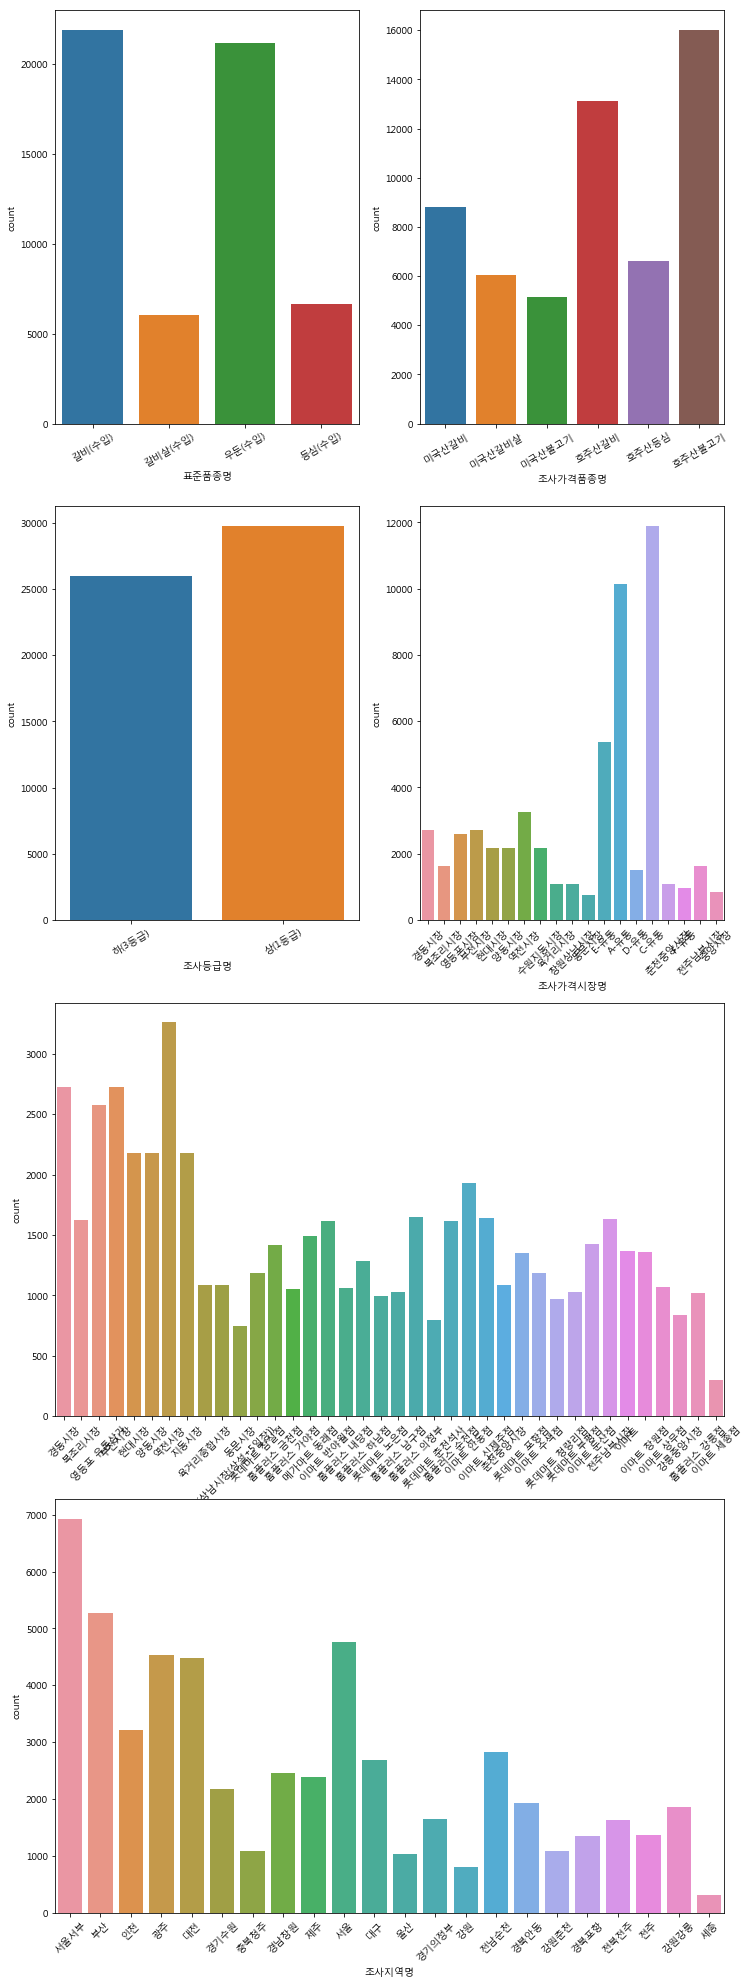

In [104]:
plt.figure(figsize=(12,35))

plt.subplot(421)
sns.countplot('표준품종명', data=beef)
plt.xticks(rotation=30)

plt.subplot(422)
sns.countplot('조사가격품종명', data=beef)
plt.xticks(rotation=30)

plt.subplot(423)
sns.countplot('조사등급명', data=beef)
plt.xticks(rotation=30)

plt.subplot(424)
sns.countplot('조사가격시장명', data=beef)
plt.xticks(rotation=45)

plt.subplot(413)
sns.countplot('표준시장명', data=beef)
plt.xticks(rotation=45)

plt.subplot(414)
sns.countplot('조사지역명', data=beef)
plt.xticks(rotation=45)

plt.show()

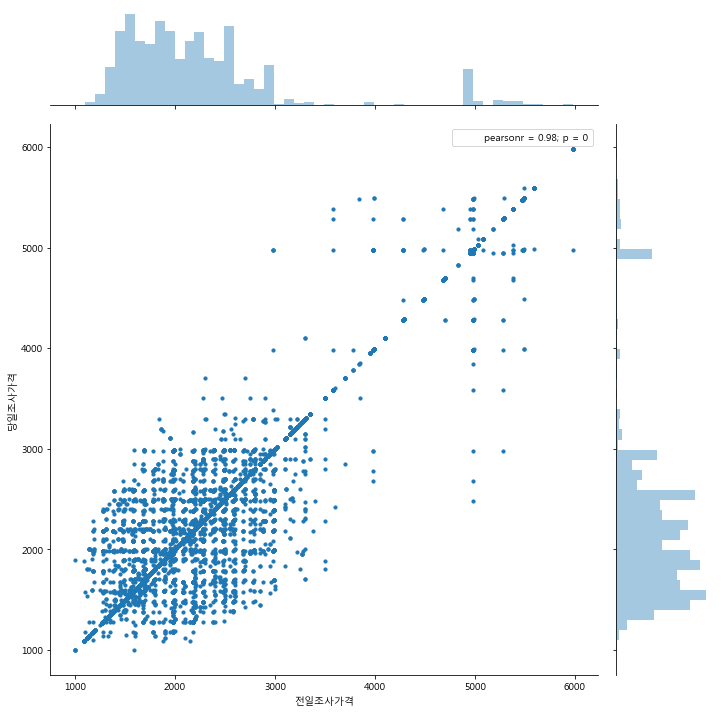

In [105]:
sns.jointplot(x='전일조사가격',y='당일조사가격', data=beef, s=10, size=10)
plt.show()

#### 2. 가격분포

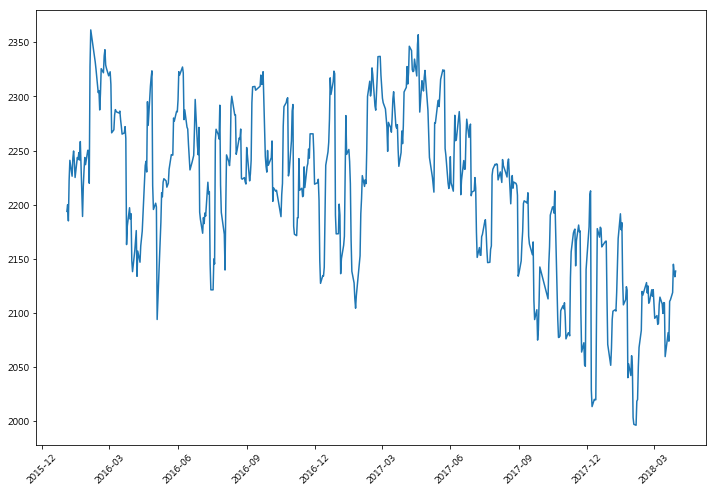

In [122]:
plt.figure(figsize=(12,8))
plt.plot(beef.groupby('조사일자')['당일조사가격'].mean())
plt.xticks(rotation=45)
plt.show()

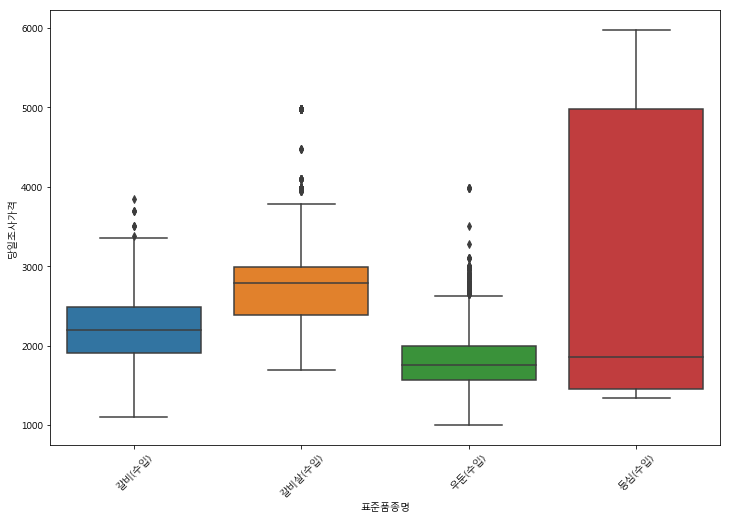

In [121]:
plt.figure(figsize=(12,8))
sns.boxplot(x='표준품종명', y='당일조사가격', data=beef)
plt.xticks(rotation=45)
plt.show()

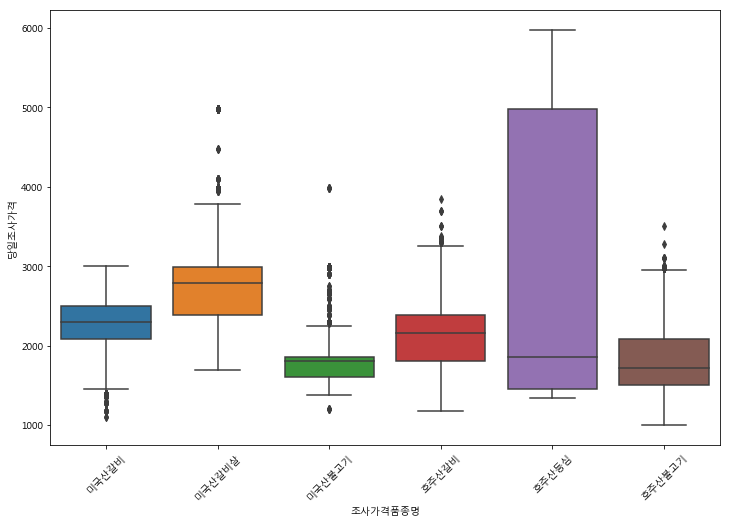

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(x='조사가격품종명', y='당일조사가격', data=beef)
plt.xticks(rotation=45)
plt.show()

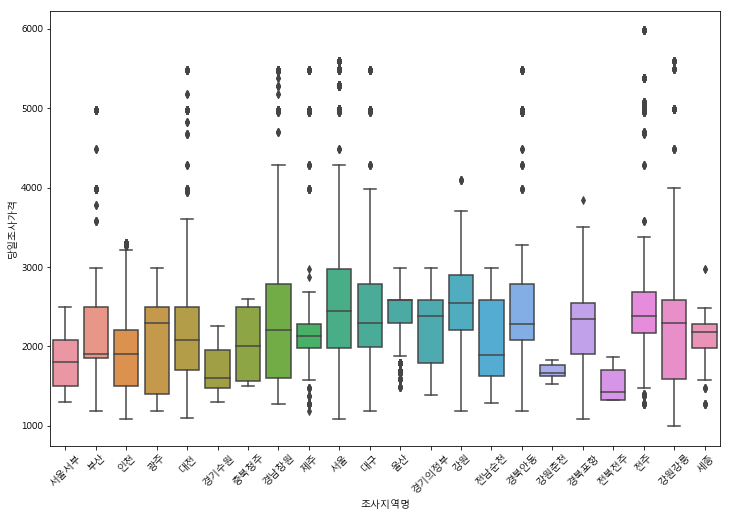

In [119]:
plt.figure(figsize=(12,8))
sns.boxplot(x='조사지역명', y='당일조사가격', data=beef)
plt.xticks(rotation=45)
plt.show()

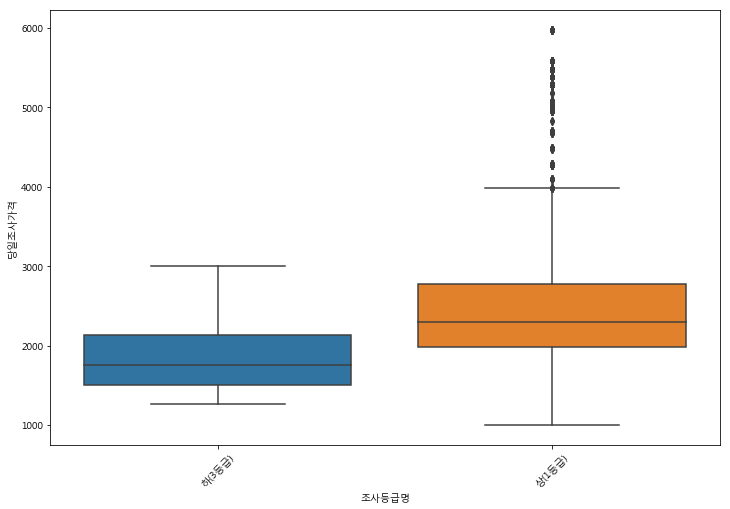

In [123]:
plt.figure(figsize=(12,8))
sns.boxplot(x='조사등급명', y='당일조사가격', data=beef)
plt.xticks(rotation=45)
plt.show()

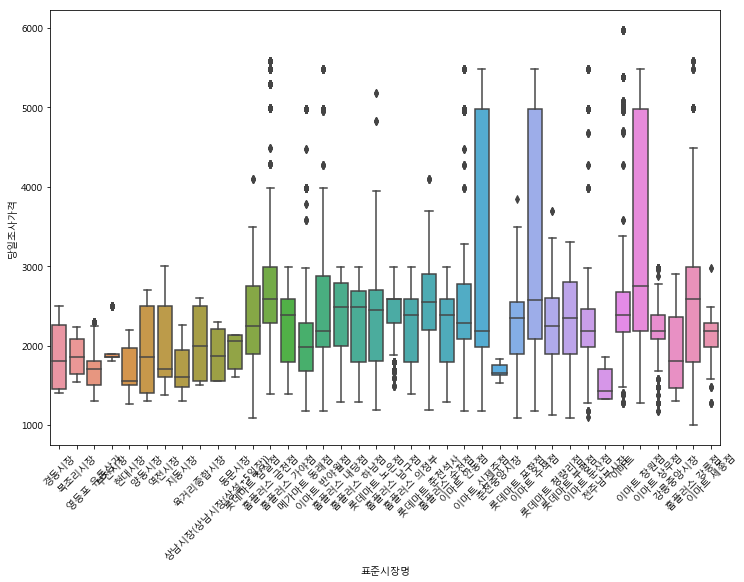

In [118]:
plt.figure(figsize=(12,8))
sns.boxplot(x='표준시장명', y='당일조사가격', data=beef)
plt.xticks(rotation=45)
plt.show()

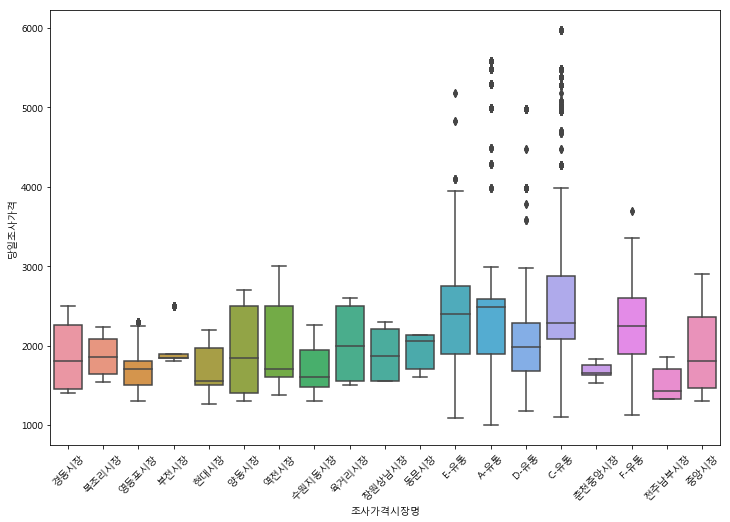

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(x='조사가격시장명', y='당일조사가격', data=beef)
plt.xticks(rotation=45)
plt.show()